In [1]:
%pwd

'/Users/ryandevera/data-science/umn_environments/Deeplifting/deeplifting/notebooks'

In [2]:
%cd ../..

/Users/ryandevera/data-science/umn_environments/Deeplifting


In [3]:
%ls

README.md                      images/
__pycache__/                   jobs/
algorithm_compare_results/     models/
deeplifting/                   requirements.txt
deeplifting.png                results/
high-dimension-paper-results/  search_results/
high-dimension-search_results/ tasks.py


In [4]:
import glob as glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
file_directory = './algorithm_compare_results/low-dimensional/*/*'
files = glob.glob(file_directory)
files

['./algorithm_compare_results/low-dimensional/2023-09-14-12-cross_leg_table/low-dimensional.parquet',
 './algorithm_compare_results/low-dimensional/2023-09-14-13-rosenbrock/low-dimensional.parquet',
 './algorithm_compare_results/low-dimensional/2023-09-14-12-levy_n13/low-dimensional.parquet',
 './algorithm_compare_results/low-dimensional/2023-09-14-12-cross_in_tray/low-dimensional.parquet',
 './algorithm_compare_results/low-dimensional/2023-09-14-12-holder_table/low-dimensional.parquet',
 './algorithm_compare_results/low-dimensional/2023-09-14-13-mathopt6/low-dimensional.parquet',
 './algorithm_compare_results/low-dimensional/2023-09-14-13-ex8_1_1/low-dimensional.parquet',
 './algorithm_compare_results/low-dimensional/2023-09-14-12-ackley/low-dimensional.parquet',
 './algorithm_compare_results/low-dimensional/2023-09-14-13-alpine2/low-dimensional.parquet',
 './algorithm_compare_results/low-dimensional/2023-09-14-12-bukin_n6/low-dimensional.parquet',
 './algorithm_compare_results/low-di

In [6]:
len(files)

24

In [7]:
# Load in the data
data = pd.read_parquet(files)
data.head()

,x1,x2,f,algorithm,time,problem_name,hits,dimensions
0,0.964410,4.291258,-0.000054,IPOPT,2.595234,cross_leg_table,0,2
1,-9.947033,5.034317,-0.000070,IPOPT,2.395830,cross_leg_table,0,2
2,-1.100523,-8.526137,-0.000062,IPOPT,2.361027,cross_leg_table,0,2
3,1.005020,4.147946,-0.000054,IPOPT,2.594456,cross_leg_table,0,2
4,9.383436,0.926649,-0.000086,IPOPT,2.521434,cross_leg_table,0,2


In [8]:
data['algorithm'].unique()

array(['IPOPT', 'Dual Annealing', 'Differential Evolution', 'PyGRANSO',
       'SCIP'], dtype=object)

In [9]:
# Let's look at shubert
data.loc[data['problem_name'] == 'rosenbrock']

,x1,x2,f,algorithm,time,problem_name,hits,dimensions
50,0.999997,0.999994,9.017401e-12,IPOPT,0.125043,rosenbrock,1,2
51,0.999997,0.999994,9.021844e-12,IPOPT,0.067197,rosenbrock,1,2
52,0.999997,0.999994,8.125772e-12,IPOPT,0.071987,rosenbrock,1,2
53,0.999997,0.999994,8.062882e-12,IPOPT,9.308106,rosenbrock,1,2
54,0.999997,0.999994,9.054665e-12,IPOPT,0.113166,rosenbrock,1,2
55,0.999997,0.999994,9.445436e-12,IPOPT,0.129042,rosenbrock,1,2
56,0.999997,0.999994,9.034004e-12,IPOPT,0.076663,rosenbrock,1,2
57,0.999997,0.999994,1.007582e-11,IPOPT,0.098874,rosenbrock,1,2
58,0.999997,0.999994,9.089669e-12,IPOPT,0.110126,rosenbrock,1,2
59,0.999997,0.999994,9.922316e-12,IPOPT,0.047536,rosenbrock,1,2


In [10]:
aggregate_dict = {
    'hits': ['mean'],
}

# We want to group this data by
# problem name
# algorithm
# attributions are f, hits and time
results = data.groupby(['problem_name', 'algorithm', 'dimensions']).agg(aggregate_dict)

results.columns = ['-'.join(column) for column in results.columns]
results = results.rename(columns={'hits-mean': 'Success Rate'}).reset_index()

algorithm_map = {
    'Differential Evolution': 'DE',
    'Dual Annealing': 'DA',
    'IPOPT': 'IPOPT',
    'PyGRANSO': 'PyGRANSO',
    'SCIP': 'SCIP',
}
results['algorithm'] = results['algorithm'].map(algorithm_map)
results

,problem_name,algorithm,dimensions,Success Rate
0,ackley,DE,2,1.0
1,ackley,DA,2,1.0
2,ackley,IPOPT,2,0.0
3,ackley,PyGRANSO,2,0.0
4,ackley,SCIP,2,1.0
...,...,...,...,...
115,shubert,DE,2,1.0
116,shubert,DA,2,1.0
117,shubert,IPOPT,2,0.1
118,shubert,PyGRANSO,2,0.2


In [11]:
# Let's try a heat map to look at all problems
hits_df = results.pivot_table(
    index='problem_name', columns='algorithm', values='Success Rate'
)

In [12]:
hits_df

algorithm,DA,DE,IPOPT,PyGRANSO,SCIP
problem_name,,,,,
ackley,1.0,1.0,0.0,0.0,1.0
ackley2,1.0,0.9,1.0,0.1,1.0
ackley3,1.0,1.0,0.0,0.2,1.0
adjiman,1.0,1.0,0.9,0.8,1.0
alpine1,1.0,1.0,1.0,0.7,1.0
alpine2,0.0,0.0,0.0,0.0,0.0
bartels_conn,1.0,0.7,1.0,0.9,1.0
bukin_n6,0.0,0.0,0.0,0.0,1.0
cross_in_tray,1.0,1.0,0.0,0.3,0.0


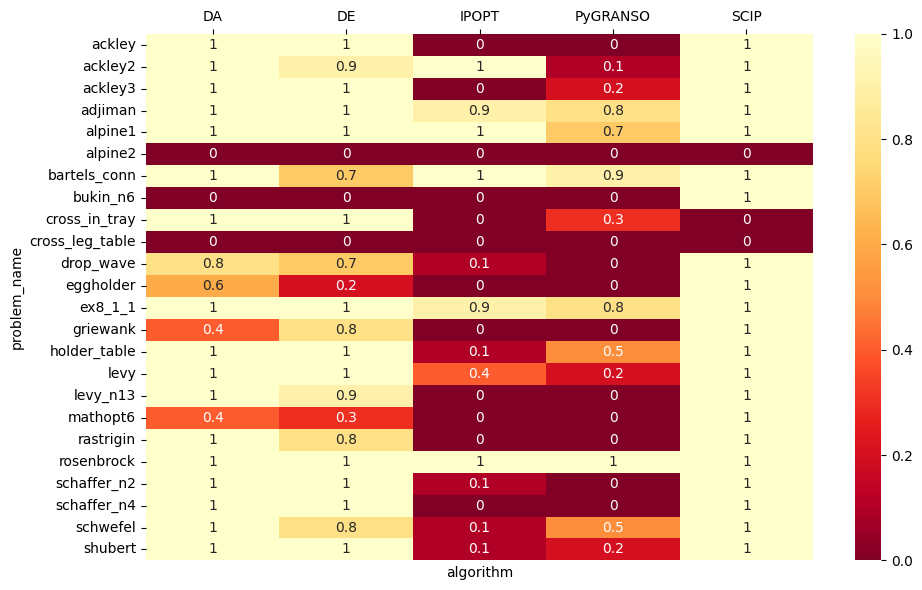

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

sns.heatmap(data=hits_df, annot=True, cmap='YlOrRd_r', ax=ax1)
ax1.xaxis.tick_top()

fig.tight_layout()